## Hipótesis y correlación

In [1]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización
import lec4_graphs as gfx
# evitar warnings y deprecaciones
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn') # gráficos estilo seaborn
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6,4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 400 # resolución gráficos

#plt.rcParams["figure.figsize"] = (60, 20) # Tamaño gráficos
#plt.rcParams["figure.dpi"] = 600 # resolución gráficos
# importamos la base de datos
df = pd.read_csv('qog_std_cs_jan18.csv')

In [2]:
df.head(10)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28,Antigua and Barbuda,ATG,58.0,28.0,QoGStdCSJan18,NaN,NaN,11.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,31,Azerbaijan,AZE,373.0,31.0,QoGStdCSJan18,NaN,NaN,25.0,15.0,...,2.922372,2.025111,2.305843,5.581910,6.662893,4.948389,3.753472,-0.667609,-0.416085,0.152803
7,32,Argentina,ARG,160.0,32.0,QoGStdCSJan18,NaN,NaN,23.0,7.0,...,1.850180,2.163982,2.091454,6.517899,7.488213,6.504242,3.989496,0.161507,-0.103415,0.198548
8,36,Australia,AUS,900.0,36.0,QoGStdCSJan18,134.0,2.866382e+09,NaN,NaN,...,1.606337,2.209082,1.755517,6.321970,7.203336,4.063055,4.069681,1.044364,0.422270,0.518140
9,40,Austria,AUT,305.0,40.0,QoGStdCSJan18,103.0,3.775100e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Refactorizando nuestros gráficos 

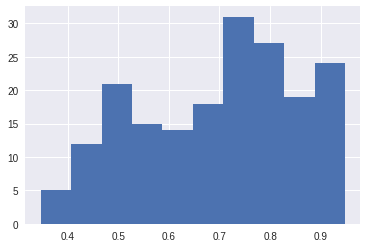

In [3]:
plt.hist(df['undp_hdi'].dropna());

## seaborn | distplot

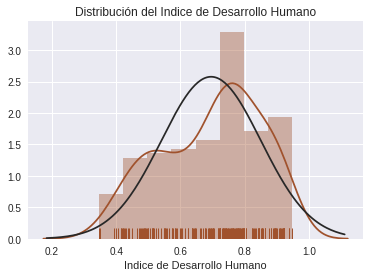

In [4]:
sns.distplot(df['undp_hdi'].dropna(), rug=True,
axlabel="Indice de Desarrollo Humano",
fit=stats.norm, color='sienna').set_title('Distribución del Indice de Desarrollo Humano');

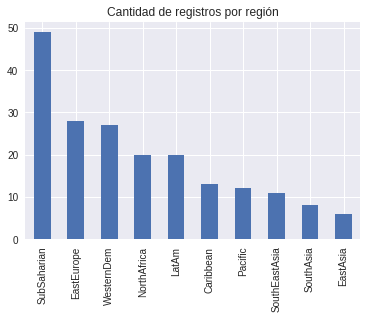

In [5]:
# generemos una variable para agregar los nombres asociados a cada número
df['region_recod'] = df['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
['EastEurope', 'LatAm', 'NorthAfrica',
'SubSaharian', 'WesternDem', 'EastAsia',
'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])
# gráficamos en barras el resultado de value_counts.
df['region_recod'].value_counts().plot(kind='bar').set_title('Cantidad de registros por región');

## seaborn | countplot

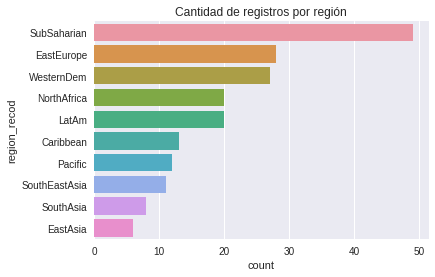

In [6]:
sns.countplot(y= df['region_recod'],
order = df['region_recod'].value_counts().index).set_title('Cantidad de registros por región');

In [7]:
# generamos una recodificación binaria con np.where
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No democracia')
submuestra = df.loc[:,['undp_hdi', 'ccodealp', 'cname', 'ht_region', 'gle_cgdpc', 'gol_inst', 'democracies']]
submuestra.sample(20)

,undp_hdi,ccodealp,cname,ht_region,gle_cgdpc,gol_inst,democracies
27,0.798,BLR,Belarus,1,17780.6410,NaN,No democracia
115,0.645,MAR,Morocco,3,3999.5601,NaN,No democracia
72,0.490,HTI,Haiti,2,1024.9399,NaN,No democracia
177,0.764,TUR,Turkey,3,16900.7110,0.0,Democracia
108,0.513,MRT,Mauritania,4,2223.0100,4.0,No democracia
18,0.747,BIH,Bosnia and Herzegovina,1,8507.6504,NaN,No democracia
128,0.637,FSM,Micronesia,9,2624.0500,2.0,Democracia
152,0.775,SRB,Serbia,1,11343.9200,1.0,Democracia
48,0.923,DNK,Denmark,5,37406.7620,0.0,Democracia
78,0.774,IRN,Iran,3,12889.2800,NaN,No democracia


Text(0.5, 1.0, 'Cantidad de gobiernos en cada región, según tipo de gobierno')

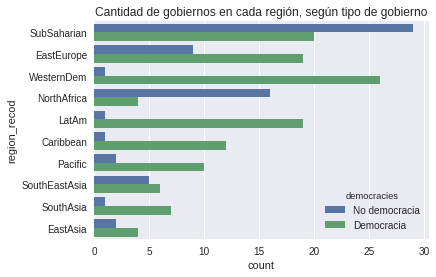

In [8]:
sns.countplot(y = df['region_recod'], hue=df['democracies'],
order = df['region_recod'].value_counts().index).set_title('Cantidad de gobiernos en cada región, según tipo de gobierno')

## swarmplot

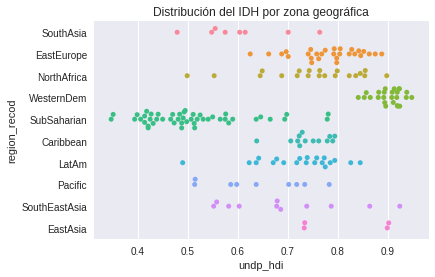

In [9]:
sns.swarmplot(y=df['region_recod'], x=df['undp_hdi']).set_title('Distribución del IDH por zona geográfica');

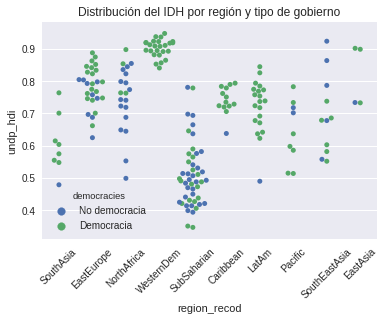

In [10]:
plt.xticks(rotation = 45)
sns.swarmplot(x=df['region_recod'], y=df['undp_hdi'], hue = df['democracies']).set_title(
'Distribución del IDH por región y tipo de gobierno');

## FacetGrid

## Iniciar un objeto FacetGrid

In [11]:
df['gol_inst'].value_counts()

0.0    54
2.0    41
1.0    32
4.0     2
Name: gol_inst, dtype: int64

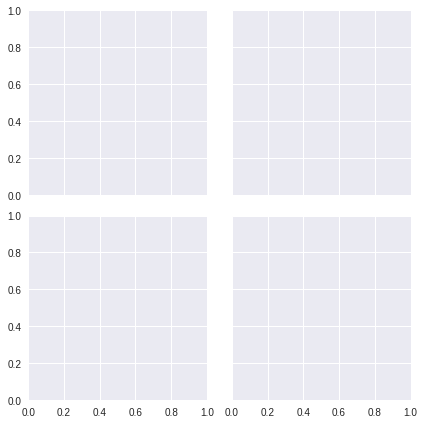

In [12]:
grid = sns.FacetGrid(df, col="gol_inst", col_wrap = 2)

## Aplicar gráficos a nuestro objeto

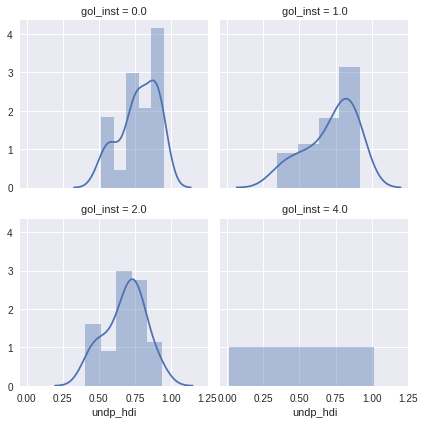

In [13]:
#sns.set(font_scale=0.8) # Escalamiento de los titulos para que no sean tan grandes
grid = sns.FacetGrid(df, col="gol_inst", col_wrap=2)
axes = grid.axes.flatten() # Obtener los ejes de ploteo para poder darle titulo a cada grafico
axes[0].set_title('gol_inst = 0.0 regímenes parlamentarios')
axes[1].set_title('gol_inst = 1.0 semi-presidenciales')
axes[2].set_title('gol_inst = 2.0 presidenciales')
axes[3].set_title('gol_inst = 4.0 dictaduras militares')
grid = grid.map(sns.distplot, "undp_hdi")

Al visualizar los histogramas, observamos que las distribuciones del índice de desarrollo humano
tienden a ser similares entre los regímenes parlamentarios ( gol_inst=0.0 ), semi-presidenciales
( gol_inst=1.0 ) y presidenciales ( gol_inst=2.0 ). Se observa que los regímenes presidenciales
tienden a presentar niveles de desarrollo más bajo, en comparación a los regímenes parlamentarios
y semi parlamentarios.
Con respecto al error, si investigamos un poco, encontraremos que el error con el que nos topamos
se produce cuanto un método se encuentra con un argumento de largo nulo, el error se produce
específicamente al graficar la distribución del Índice de Desarrollo Humano para las dictaduras
militares ( gol_inst=4.0 ), analicemos los datos que debían ser graficados:

In [14]:
print('Cantidad de dictaduras militares registradas: %d' %len(df.loc[df['gol_inst'] == 4.0]))
print('Cantidad de NaN en la columna \'undp_hdi\' para las dictaduras militares: %d'%df.loc[df['gol_inst'] == 4.0]['undp_hdi'].isnull().sum())

Cantidad de dictaduras militares registradas: 2
Cantidad de NaN en la columna 'undp_hdi' para las dictaduras militares: 1


La baja cantidad de dictaduras militares ( gol_inst=4.0 ) nos impide sacar cualquier conclusión
general válida con respecto al Índice de Desarrollo Humano de este tipo de gobiernos.

## Scatterplots

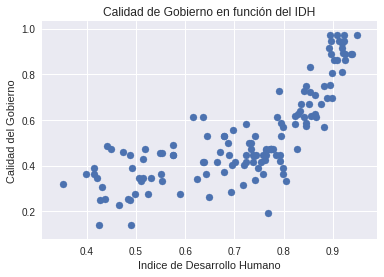

In [15]:
# generamos el gráfico
# X = Independiente
# Y = Dependiente
plt.scatter(x=df['undp_hdi'], y=df['icrg_qog'])
plt.title('Calidad de Gobierno en función del IDH')
plt.xlabel("Indice de Desarrollo Humano")
plt.ylabel("Calidad del Gobierno");

A simple vista, el gráfico enseña que en la medida que el índice de desarrollo humano va
aumentando en la escala, la calidad del gobierno mejora de igual manera. Este comportamiento se
conoce como una relación directamente proporcional. Esto nos servirá para hablar de medidas de
asociación.

## Refactorizando el gráfico

## matplotlib | np.polyfit

In [16]:
# Separemos las columnas a trabajar y eliminemos los datos perdidos.
scatter_data = df.loc[:, ['undp_hdi', 'icrg_qog', 'ccodealp']].dropna()
scatter_data.sample(10)

,undp_hdi,icrg_qog,ccodealp
115,0.645,0.530093,MAR
137,0.852,0.668981,POL
94,0.763,0.472222,LBN
72,0.490,0.138889,HTI
96,0.828,0.627315,LVA
155,0.924,0.861111,SGP
112,0.733,0.500000,MNG
86,0.793,0.444444,KAZ
45,0.854,0.833333,CYP
40,0.590,0.277778,COG


In [17]:
# calculamos los valores de la recta
pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'], scatter_data['icrg_qog'], 1)

In [18]:
pendiente

1.0077917998503934

In [19]:
intercepto

-0.1954107728917399

In [20]:
# pidamos los valores
print("La pendiente es de: ", pendiente.round(3))
print("El intercepto es de: ", intercepto.round(3))

La pendiente es de:  1.008
El intercepto es de:  -0.195


## Digresión: Comprensiones de Lista

[expresion_a_evaluar for variable in secuencia_de_valores]

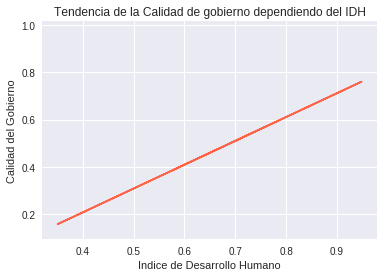

In [21]:
# para separar los elementos del gráfico, generamos dos objetos a partir de subplots
fig, ax = plt.subplots()
# generamos el gráfico, declaramos que los puntos sean lo más pequeños posible con marker="," y
s=.1
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker=",", s=.1)
# graficamos la recta a lo largo de undp_hdi
ax.plot(scatter_data['undp_hdi'],
# generamos un list comprehension que calcule el valor de la recta a lo largo de undp_hdi
[pendiente * j + intercepto for j in scatter_data['undp_hdi']],color='tomato')
ax.set_title('Tendencia de la Calidad de gobierno dependiendo del IDH')
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno");

In [22]:
scatter_data.head(3)

,undp_hdi,icrg_qog,ccodealp
1,0.762,0.425926,ALB
2,0.743,0.444444,DZA
4,0.531,0.344907,AGO


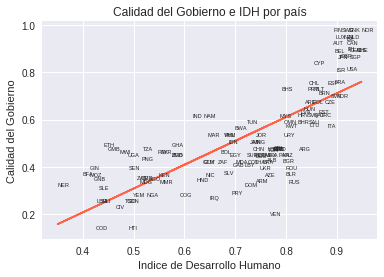

In [23]:
fig, ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker=",", s=.1)
ax.plot(scatter_data['undp_hdi'],
[pendiente * j + intercepto for j in scatter_data['undp_hdi']],
color='tomato')
for i in scatter_data.index:
    ax.text(scatter_data.loc[i, 'undp_hdi'],
    scatter_data.loc[i, 'icrg_qog'],str(scatter_data.loc[i, 'ccodealp']),
    fontsize = 5.5)
ax.set_title('Calidad del Gobierno e IDH por país')
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno");

El gráfico nos informa de la posición de países como Haití, con un nivel bajo de desarrollo humano
y de calidad de gobierno, así como de un cluster importante de países con niveles de desarrollo
humano sobre el .90 y calidad de gobierno substancialmente alto.

## Refactorización con seaborn

## seaborn | jointplot

permite
realizar una diagrama de dispersión con más información

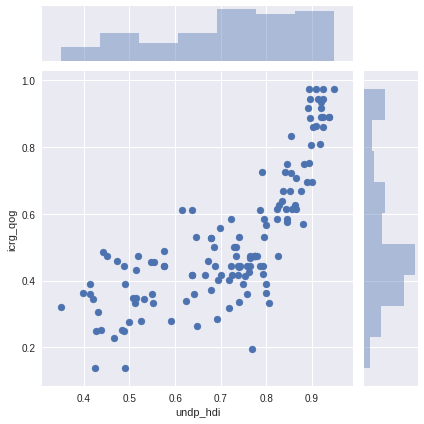

In [24]:
sns.jointplot(df['undp_hdi'], df['icrg_qog']);

## agregar una recta de ajuste

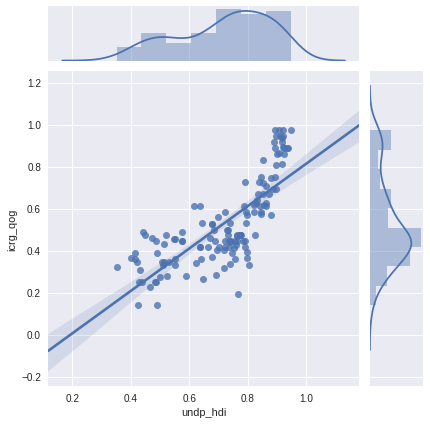

In [25]:
sns.jointplot(scatter_data['undp_hdi'], scatter_data['icrg_qog'], kind='reg');

E reporta un estadístico pearsonr = 0.77; p = 1.8e-25 . La primera cifra resume la intensidad y
dirección de la asociación, mientras que la segunda reporta su plausibilidad bajo condiciones
similares.
El primer elemento se conoce como Correlación de Pearson, y el segundo como p Value.
Dedicaremos el resto de la lectura a estudiarlos.

## Correlación y Covarianza

<b>El único objetivo de la correlación y covarianza en cuantificar el grado en que dos variables viajan
juntas.</b>

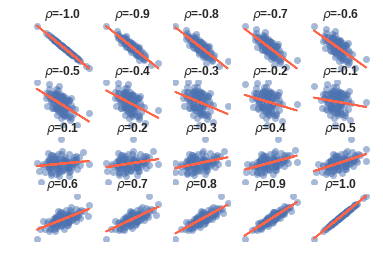

In [26]:
gfx.generate_corr_matrix();

<b>El gráfico de seaborn nos indicaba que su pearsonr era de .77. Esperamos que en la
medida que aumenten los valores del índice de desarrollo humano, también lo hagan los valores de
la calidad de gobierno</b>

## pandas | corr

In [27]:
scatter_data['undp_hdi'].corr(scatter_data['icrg_qog'])

0.7694078965882

## Matrices de correlación

In [28]:
wvs_subset = df.loc[: , 'wvs_auton':'wvs_trust']
wvs_subset.sample(5)

,wvs_auton,wvs_confaf,wvs_confch,wvs_confcs,wvs_confenv,wvs_confgov,wvs_confjs,wvs_conflu,wvs_confpar,wvs_confpol,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
38,0.659392,2.655585,3.168547,1.871829,2.993271,2.250667,2.122901,1.799864,1.790713,2.384207,...,2.410116,2.700542,2.677375,6.696889,8.388227,6.85924,4.005294,0.252633,-1.00909,0.041306
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,-0.121667,2.425021,2.370757,2.188317,2.372703,1.954035,2.338583,2.141187,2.061883,2.343129,...,2.532534,2.734483,2.695132,5.998332,6.503772,5.74750,3.979933,-0.462340,-0.07072,0.109057
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
wvs_subset['region'] = df['region_recod']
wvs_subset['country'] = df['cname']
wvs_subset.sample(5)

,wvs_auton,wvs_confaf,wvs_confch,wvs_confcs,wvs_confenv,wvs_confgov,wvs_confjs,wvs_conflu,wvs_confpar,wvs_confpol,...,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,region,country
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SubSaharian,Chad
6,-0.723759,3.035106,2.321194,2.670265,2.351506,3.167506,2.629432,2.289796,2.786036,2.639084,...,2.305843,5.58191,6.662893,4.948389,3.753472,-0.667609,-0.416085,0.152803,EastEurope,Azerbaijan
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LatAm,El Salvador
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SouthEastAsia,Indonesia
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EastEurope,Latvia


In [30]:
wvs_subset = wvs_subset.dropna()

In [31]:
wvs_subset.sample(5)

,wvs_auton,wvs_confaf,wvs_confch,wvs_confcs,wvs_confenv,wvs_confgov,wvs_confjs,wvs_conflu,wvs_confpar,wvs_confpol,...,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,region,country
13,0.015506,3.439688,3.187937,2.137950,2.331321,2.176698,2.027538,1.759222,1.947258,2.156231,...,2.358851,4.248916,5.240819,6.825514,3.317059,-0.592649,-0.479951,0.110230,EastEurope,Armenia
136,0.057441,2.883594,3.680651,2.775429,3.116524,2.623608,2.819785,2.492409,2.659032,2.812310,...,2.716455,6.339219,7.326415,5.644417,3.691490,0.076220,-0.683717,0.031671,SouthEastAsia,Philippines
160,-0.172764,2.478569,3.170746,2.379346,2.529673,2.427486,2.516612,2.371201,2.378740,2.413865,...,3.186284,6.129374,6.626737,6.825221,4.213035,0.045268,-0.074119,0.234122,SubSaharian,South Africa
20,0.354662,2.647916,2.810610,2.367870,2.654232,2.148636,2.373079,2.137752,1.704346,2.219243,...,2.431594,6.214656,7.840864,4.016381,3.923859,0.096261,-0.420442,0.071162,LatAm,Brazil
177,0.006440,3.109386,3.020517,2.628980,2.498549,2.706388,2.876104,2.320682,2.597923,3.037958,...,3.100911,6.174196,7.244892,5.968442,3.816401,-0.290703,-0.621699,0.122955,NorthAfrica,Turkey


## sns.heatmap

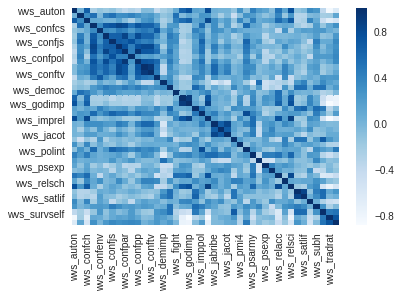

In [32]:
corr_mat = wvs_subset.corr()
# output omitido
# corr_mat
sns.heatmap(corr_mat, cmap='Blues');

Para este ejemplo, exploraremos las relaciones entre las creencias religiosas y felicidad de las
naciones. Partamos por seleccionar las columnas con .loc :

In [33]:
working_subset = wvs_subset.loc[:, ['wvs_godbel', 'wvs_godimp', 'wvs_hap', 'wvs_imprel']]

Las variables que seleccionamos son:
* wvs_godbel : Porcentaje de gente que cree en Dios.
* wvs_godimp : Qué tan importante es Dios en la vida de las personas.
* wvs_hap : Felicidad reportada por los encuestados.
* wvs_imprel : Qué tan importante es la religión en la vida de las personas.

In [34]:
working_subset.sample(1)

,wvs_godbel,wvs_godimp,wvs_hap,wvs_imprel
98,0.997463,9.724662,3.243026,3.960743


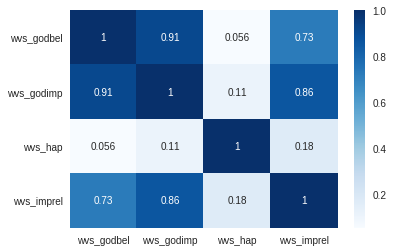

In [35]:
corr_mat = working_subset.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True);

* Hay correlaciones de una magnitud susbtancial entre la importancia de Dios, de la religión y la
creencia a nivel mundial.
* No hay correlaciones substanciales entre los niveles de felicidad reportados y la importancia
asignada a la reglión en general.

## Matrices personalizadas con PairGrid